In [170]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Loading

In [171]:
df=pd.read_csv("train.csv")

In [172]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [173]:
f_27=df[['f_27','target']]
f_27

,f_27,target
0,ABABDADBAB,0
1,ACACCADCEB,1
2,AAAEABCKAD,1
3,BDBBAACBCB,1
4,BDBCBBCHFE,1
...,...,...
899995,BABBCBBBED,1
899996,BBBGBBDQBE,0
899997,AEBEDBBHBA,0
899998,ADBAAADDAE,0


In [174]:
for i in range(10):
    id="f27_"+str(i)
    f_27[id]=f_27['f_27'].astype(str).str[i]

C:\Users\AZMINE~1\AppData\Local\Temp/ipykernel_6716/3144347877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_27[id]=f_27['f_27'].astype(str).str[i]


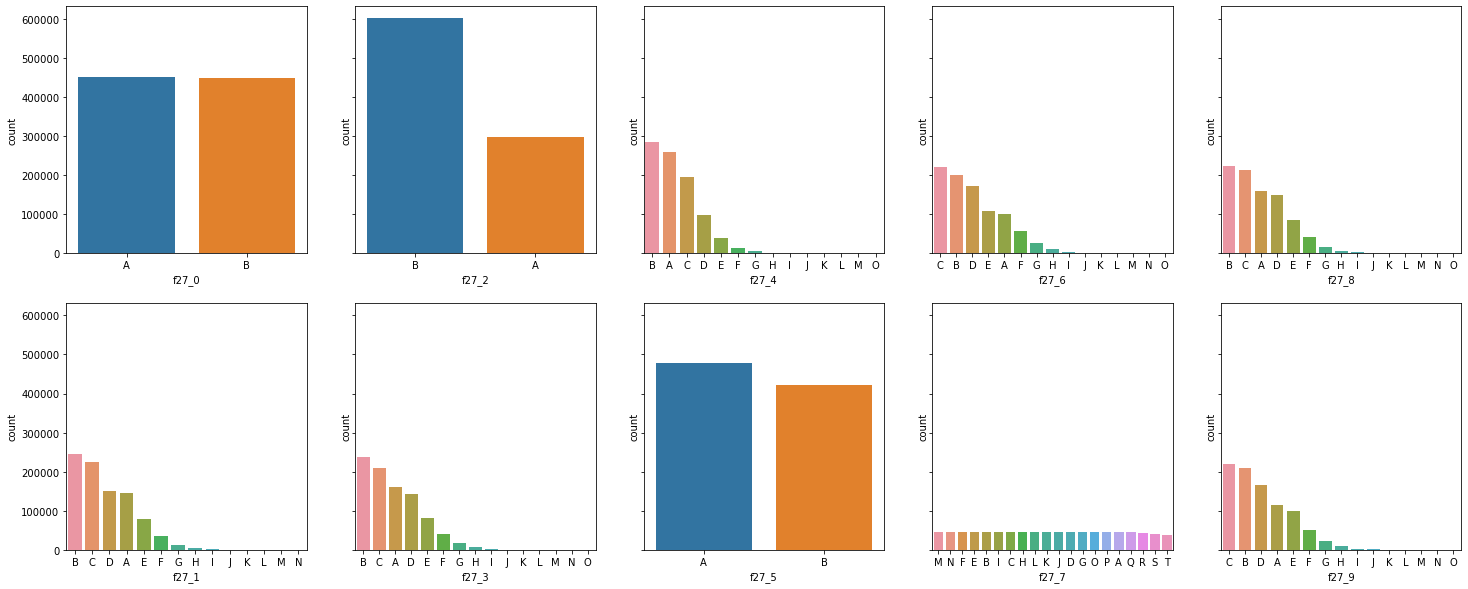

In [175]:
fig, axes = plt.subplots( 2,5, figsize=(25,10), sharey=True)
for i in range(10):
    id="f27_"+str(i)
    i=i-1
    if i%2!=0:
        sns.countplot(ax=axes[0,int((i+1)/2)],data=f_27, x=id, order=f_27[id].value_counts().index)
    else:
        sns.countplot(ax=axes[1,int(i/2)],data=f_27, x=id, order=f_27[id].value_counts().index)
    i=i+1
    

# f_27 to numerical [ASCII]

In [176]:
l1=[c for c in "QWERTYUIOPLKJHGFDSAZXCVBNM"]   
l2=[ord(c) for c in "QWERTYUIOPLKJHGFDSAZXCVBNM"]
res = {}
for key in l1:
    for value in l2:
        res[key] = value
        l2.remove(value)
        break  

print(res)
ids=[]
for i in range(10):
    id="f27_"+str(i)
    ids.append(id)

f_27e=f_27[ids].replace(res)
f_27e[['f_27','target']]=df[['f_27','target']]

f_27e


{'Q': 81, 'W': 87, 'E': 69, 'R': 82, 'T': 84, 'Y': 89, 'U': 85, 'I': 73, 'O': 79, 'P': 80, 'L': 76, 'K': 75, 'J': 74, 'H': 72, 'G': 71, 'F': 70, 'D': 68, 'S': 83, 'A': 65, 'Z': 90, 'X': 88, 'C': 67, 'V': 86, 'B': 66, 'N': 78, 'M': 77}


,f27_0,f27_1,f27_2,f27_3,f27_4,f27_5,f27_6,f27_7,f27_8,f27_9,f_27,target
0,65,66,65,66,68,65,68,66,65,66,ABABDADBAB,0
1,65,67,65,67,67,65,68,67,69,66,ACACCADCEB,1
2,65,65,65,69,65,66,67,75,65,68,AAAEABCKAD,1
3,66,68,66,66,65,65,67,66,67,66,BDBBAACBCB,1
4,66,68,66,67,66,66,67,72,70,69,BDBCBBCHFE,1
...,...,...,...,...,...,...,...,...,...,...,...,...
899995,66,65,66,66,67,66,66,66,69,68,BABBCBBBED,1
899996,66,66,66,71,66,66,68,81,66,69,BBBGBBDQBE,0
899997,65,69,66,69,68,66,66,72,66,65,AEBEDBBHBA,0
899998,65,68,66,65,65,65,68,68,65,69,ADBAAADDAE,0


In [177]:
corr = f_27e.corr()
corr.style.background_gradient(cmap='coolwarm')

,f27_0,f27_1,f27_2,f27_3,f27_4,f27_5,f27_6,f27_7,f27_8,f27_9,target
f27_0,1.000000,-0.121865,0.009977,-0.204510,0.098888,0.039846,-0.000277,0.011440,-0.022162,-0.039759,-0.100203
f27_1,-0.121865,1.000000,0.149957,-0.008890,-0.046533,-0.104104,-0.018994,0.000999,0.040311,0.044185,-0.081153
f27_2,0.009977,0.149957,1.000000,-0.090144,-0.101288,-0.004074,-0.158590,0.011217,0.052796,0.225509,-0.066436
f27_3,-0.204510,-0.008890,-0.090144,1.000000,-0.039418,0.262013,0.095978,-0.007668,-0.013902,-0.047099,-0.068222
f27_4,0.098888,-0.046533,-0.101288,-0.039418,1.000000,-0.045292,-0.018189,0.000736,0.001024,-0.097080,0.066994
f27_5,0.039846,-0.104104,-0.004074,0.262013,-0.045292,1.000000,0.123442,0.009091,-0.001514,-0.006953,0.038562
f27_6,-0.000277,-0.018994,-0.158590,0.095978,-0.018189,0.123442,1.000000,-0.002180,-0.016728,-0.063159,-0.054114
f27_7,0.011440,0.000999,0.011217,-0.007668,0.000736,0.009091,-0.002180,1.000000,0.001503,0.008315,0.105687
f27_8,-0.022162,0.040311,0.052796,-0.013902,0.001024,-0.001514,-0.016728,0.001503,1.000000,0.035283,0.114778
f27_9,-0.039759,0.044185,0.225509,-0.047099,-0.097080,-0.006953,-0.063159,0.008315,0.035283,1.000000,0.154076


# original f_27 encoding

In [178]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
lbe = LabelEncoder()
f_27e['f_27'] = enc.fit_transform(df['f_27'].values.reshape(-1, 1))


In [179]:
corr = f_27e.corr()
corr.style.background_gradient(cmap='coolwarm')

,f27_0,f27_1,f27_2,f27_3,f27_4,f27_5,f27_6,f27_7,f27_8,f27_9,f_27,target
f27_0,1.000000,-0.121865,0.009977,-0.204510,0.098888,0.039846,-0.000277,0.011440,-0.022162,-0.039759,0.869646,-0.100203
f27_1,-0.121865,1.000000,0.149957,-0.008890,-0.046533,-0.104104,-0.018994,0.000999,0.040311,0.044185,0.357079,-0.081153
f27_2,0.009977,0.149957,1.000000,-0.090144,-0.101288,-0.004074,-0.158590,0.011217,0.052796,0.225509,0.164492,-0.066436
f27_3,-0.204510,-0.008890,-0.090144,1.000000,-0.039418,0.262013,0.095978,-0.007668,-0.013902,-0.047099,-0.152181,-0.068222
f27_4,0.098888,-0.046533,-0.101288,-0.039418,1.000000,-0.045292,-0.018189,0.000736,0.001024,-0.097080,0.070047,0.066994
f27_5,0.039846,-0.104104,-0.004074,0.262013,-0.045292,1.000000,0.123442,0.009091,-0.001514,-0.006953,0.005726,0.038562
f27_6,-0.000277,-0.018994,-0.158590,0.095978,-0.018189,0.123442,1.000000,-0.002180,-0.016728,-0.063159,-0.017073,-0.054114
f27_7,0.011440,0.000999,0.011217,-0.007668,0.000736,0.009091,-0.002180,1.000000,0.001503,0.008315,0.013119,0.105687
f27_8,-0.022162,0.040311,0.052796,-0.013902,0.001024,-0.001514,-0.016728,0.001503,1.000000,0.035283,0.003577,0.114778
f27_9,-0.039759,0.044185,0.225509,-0.047099,-0.097080,-0.006953,-0.063159,0.008315,0.035283,1.000000,0.000205,0.154076


In [180]:
f_27e.head()

,f27_0,f27_1,f27_2,f27_3,f27_4,f27_5,f27_6,f27_7,f27_8,f27_9,f_27,target
0,65,66,65,66,68,65,68,66,65,66,58066.0,0
1,65,67,65,67,67,65,68,67,69,66,155009.0,1
2,65,65,65,69,65,66,67,75,65,68,15319.0,1
3,66,68,66,66,65,65,67,66,67,66,658667.0,1
4,66,68,66,67,66,66,67,72,70,69,673894.0,1


In [ ]:
from sklearn.model_selection import train_test_split

train_cols=ids
train_cols.append("f_27")

train_X, test_X, train_y, test_y = train_test_split(f_27e[train_cols], f_27e['target'], test_size=0.25)


In [182]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

# make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 0.3860760436479357


In [191]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


xgb_model = xgb.XGBClassifier()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.01, 0.1], #so called `eta` value
              'max_depth': [6,10,20],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1500,2000, 3000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(f_27e[train_cols], n_splits=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(f_27e[train_cols], f_27e['target'])

#trust your CV!
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

TypeError: __init__() got multiple values for argument 'n_splits'